<a href="https://colab.research.google.com/github/BUNKARRAJU/Image-Compression-Using-K-Means-Clustering/blob/main/Image%20compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

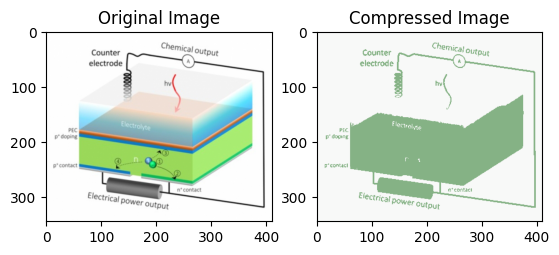

In [5]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from skimage import io
from matplotlib import pyplot as plt

def compress_image(image, k, iterations):
    """Compresses an image using K-Means clustering.

    Args:
        image: The image to be compressed.
        k: The number of clusters.
        iterations: The number of iterations to run the K-Means algorithm.

    Returns:
        The compressed image.
    """

    # Flatten the image and reshape to a 2D array
    rows, cols, _ = image.shape
    flattened_image = image.reshape(-1, 3)

    kmeans = MiniBatchKMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(flattened_image)
    compressed_image = np.zeros_like(flattened_image)
    for i in range(k):
        compressed_image[labels == i] = kmeans.cluster_centers_[i]

    # Reshape the compressed image back to the original shape
    compressed_image = compressed_image.reshape(rows, cols, 3)

    return compressed_image

def main():
    image = io.imread('2battery.jpg')
    k = 2
    iterations = 100

    compressed_image = compress_image(image, k, iterations)

    plt.subplot(121)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(122)
    plt.imshow(compressed_image)
    plt.title('Compressed Image')

    plt.show()

if __name__ == '__main__':
    main()
